In [ ]:
import numpy as np
import pandas as pa
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import folium 
import warnings
warnings.filterwarnings('ignore')
sn.set_style('darkgrid')
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Cleaning

In [ ]:
%cd drive/My\ Drive/major_project
india_data_ts = pa.read_csv('covid_19_india.csv')
print("Shape of the data {}".format(india_data_ts.shape))
india_data_ts['Date'] = pa.to_datetime(india_data_ts['Date'])
india_data_ts = india_data_ts.dropna()
india_data_ts['Date'] = india_data_ts['Date'].dt.strftime('%d/%m/%Y')

/content/drive/My Drive/major_project
Shape of the data (806, 9)


In [ ]:
india_data_ts['Date'] = pa.to_datetime(india_data_ts['Date'])
india_data_ts['year'] = india_data_ts['Date'].dt.year
india_data_ts['month'] = india_data_ts['Date'].dt.month
india_data_ts['day'] = india_data_ts['Date'].dt.day

In [ ]:
date_wise_sum = india_data_ts[['Date','Confirmed']]
#date_wise_sum = date_wise_sum.groupby(pa.Grouper(freq="M"))
#date_wise_sum  = date_wise_sum.sort_values(['Confirmed'],ascending=True)
date_wise_sum = date_wise_sum.groupby('Date')['Confirmed'].sum()

In [ ]:
# time_series = pa.read_csv("case_time_series.csv")
# date = time_series.date.values
# confirmed = time_series.total_confirmed.values
# deaths = time_series.total_deceased.values
# recovered = time_series.total_recovered.values
# print(recovered,confirmed,deaths)

import requests
url = "https://pomber.github.io/covid19/timeseries.json"
r = requests.get(url)
json_response = r.json()
indian_data = json_response['India']
# print(indian_data)
date,confirmed,deaths,recovered=[],[],[],[]

for record in indian_data:
    date.append(record['date'])
    confirmed.append(record['confirmed'])
    deaths.append(record['deaths'])
    recovered.append(record['recovered'])

In [ ]:
import plotly.express as px
fig = go.Figure()

fig.add_trace(go.Scatter(x=date, y=confirmed,name="Confirmed"))
fig.add_trace(go.Scatter(x=date, y=recovered,name="Recovered"))
fig.add_trace(go.Scatter(x=date, y=deaths,name="Deaths"))

fig.update_layout(yaxis=dict(title='Values'),width=1200,height=800,
                  title='Analysis of Death/Cured/Confirmed in India with time',
                  xaxis=dict(title='Time in Date'))

## Maharashtra

In [ ]:
## Analysing maharashtra confirmed cases
maharashtra = india_data_ts[india_data_ts['State/UnionTerritory'] == 'Maharashtra']
maharashtra_de = maharashtra[['Date','Deaths']]
maharashtra_de = maharashtra_de.groupby('Date')['Deaths'].sum()

maharashtra_con = maharashtra[['Date','Confirmed']]
maharashtra_con = maharashtra_con.groupby('Date')['Confirmed'].sum()

maharashtra_cu = maharashtra[['Date','Cured']]
maharashtra_cu = maharashtra_cu.groupby('Date')['Cured'].sum()

In [ ]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

temp = maharashtra.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time in Maharashtra', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Tamil Nadu

In [ ]:
## Analysing Tamil Nadu confirmed cases
TamilNadu = india_data_ts[india_data_ts['State/UnionTerritory'] == 'Tamil Nadu']
TamilNadu_de = TamilNadu[['Date','Deaths']]
TamilNadu_de = TamilNadu_de.groupby('Date')['Deaths'].sum()

TamilNadu_con = TamilNadu[['Date','Confirmed']]
TamilNadu_con = TamilNadu_con.groupby('Date')['Confirmed'].sum()

TamilNadu_cu = TamilNadu[['Date','Cured']]
TamilNadu_cu = TamilNadu_cu.groupby('Date')['Cured'].sum()


# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

temp = TamilNadu.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time in Tamil Nadu', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Delhi 

In [ ]:
## Analysing mumbai confirmed cases
Delhi = india_data_ts[india_data_ts['State/UnionTerritory'] == 'Delhi']
Delhi_de = Delhi[['Date','Deaths']]
Delhi_de = Delhi_de.groupby('Date')['Deaths'].sum()

Delhi_con = Delhi[['Date','Confirmed']]
Delhi_con = Delhi_con.groupby('Date')['Confirmed'].sum()

Delhi_cu = Delhi[['Date','Cured']]
Delhi_cu = Delhi_cu.groupby('Date')['Cured'].sum()


# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

temp = Delhi.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time Delhi', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# West Bengal

In [ ]:
## Analysing West bengal confirmed cases
WestBengal = india_data_ts[india_data_ts['State/UnionTerritory'] == 'West Bengal']
WestBengal_de = WestBengal[['Date','Deaths']]
WestBengal_de = WestBengal.groupby('Date')['Deaths'].sum()

WestBengal_con = WestBengal[['Date','Confirmed']]
WestBengal_con = WestBengal_con.groupby('Date')['Confirmed'].sum()

WestBengal_cu = WestBengal[['Date','Cured']]
WestBengal_cu = WestBengal_cu.groupby('Date')['Cured'].sum()


# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

temp = WestBengal.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time West Bengal', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## Age + Current Status

In [ ]:
individual_data = pa.read_csv('IndividualDetails.csv')

In [ ]:
map_ct = {'Hospitalized':1,'Recovered':2,'Deceased':3}
cleaned_individual_data = individual_data[['age','current_status']].dropna(axis=0)
cleaned_individual_data.reset_index(drop=True,inplace=True)
cleaned_individual_data['current_status'] = cleaned_individual_data['current_status'].map(lambda x:map_ct[x])

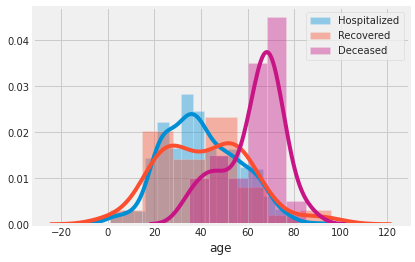

In [ ]:
hospitalized = cleaned_individual_data[cleaned_individual_data['current_status'] == 1]
hospitalized['age'] = hospitalized['age'].astype(int)
sn.distplot(hospitalized['age'],label='Hospitalized')

recovered = cleaned_individual_data[cleaned_individual_data['current_status'] == 2]
recovered['age'] = recovered['age'].astype(int)
sn.distplot(recovered['age'],label='Recovered')

Deceased = cleaned_individual_data[cleaned_individual_data['current_status'] == 3]
Deceased['age'] = Deceased['age'].astype(int)
sn.distplot(Deceased['age'],color='mediumvioletred',label='Deceased')
plt.savefig("fsf.png")
plt.legend()

In [ ]:
### GEnder and status

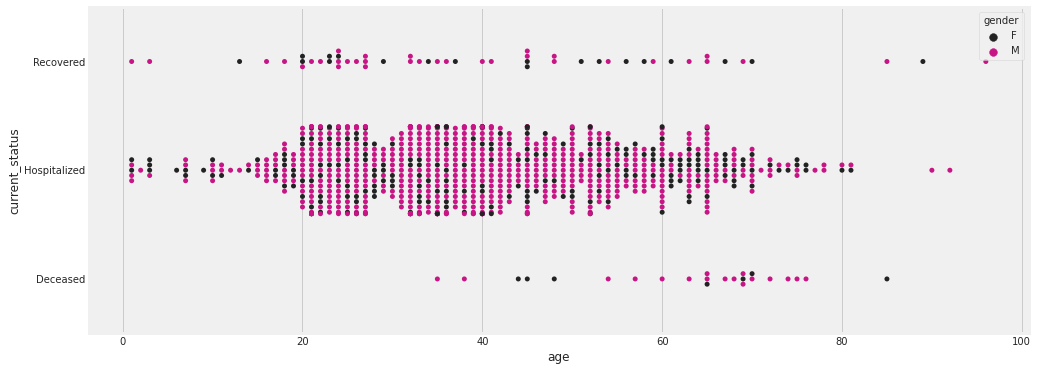

In [ ]:
plt.figure(figsize=(15,6))
individual_data_gender_status = individual_data[['gender','current_status','age']].dropna(axis=0)
individual_data_gender_status.reset_index(drop=True,inplace=True)

sns_plot = sn.swarmplot(x='age',y='current_status',hue='gender',data=individual_data_gender_status,color='mediumvioletred')
sns_plot.figure.savefig("gender.png")


In [ ]:
location_states = pa.read_csv('location_india.csv',encoding='UTF-8')

In [ ]:
#individual_location = pa.merge(individual_data,location_states,on='detected_state')

In [ ]:
recovered_cases = individual_data[individual_data['current_status'] == 'Recovered']  
recovered_cases = recovered_cases[['detected_state','current_status']]
map_1 = {'Recovered':1}
recovered_cases['current_status'] = recovered_cases['current_status'].map(lambda x:map_1[x])
recovered_cases.reset_index(drop=True,inplace=True)

recovered_cases = recovered_cases.groupby('detected_state')['current_status'].sum()

recovered_cases = pa.merge(recovered_cases,location_states,on='detected_state')

folium_map = folium.Map(location=[22.9734,78.6569],zoom_start=5,tiles='CartoDB dark_matter')


for index,row in recovered_cases.iterrows():
    color = '#0A8A9F'
    value = row['current_status']
    folium.CircleMarker(location=(row['Latitude'],row['Longitude']),radius=value,color=color,
                                popup = ('<strong><u>States</u></strong>: ' + str(recovered_cases['detected_state']).capitalize()),fill=True).add_to(folium_map)


folium_map.save(outfile= "recovered.html")    
folium_map

In [ ]:
Hospitalized_cases = individual_data[individual_data['current_status'] == 'Hospitalized']  
Hospitalized_cases = Hospitalized_cases[['detected_state','current_status']]
map_1 = {'Hospitalized':1}
Hospitalized_cases['current_status'] = Hospitalized_cases['current_status'].map(lambda x:map_1[x])
Hospitalized_cases.reset_index(drop=True,inplace=True)

Hospitalized_cases = Hospitalized_cases.groupby('detected_state')['current_status'].sum()

Hospitalized_cases = pa.merge(Hospitalized_cases,location_states,on='detected_state')

folium_map = folium.Map(location=[22.9734,78.6569],zoom_start=5,tiles='CartoDB dark_matter')


for index,row in Hospitalized_cases.iterrows():
    color = '#0F8B9F'
    value = row['current_status']/50
    folium.CircleMarker(location=(row['Latitude'],row['Longitude']),radius=value,color=color,
                                popup = ('<strong><u>States</u></strong>: ' + str(recovered_cases['detected_state']).capitalize()),fill=True).add_to(folium_map)
    
folium_map

In [ ]:
Deceased_cases = individual_data[individual_data['current_status'] == 'Deceased']  
Deceased_cases = Deceased_cases[['detected_state','current_status']]
map_1 = {'Deceased':1}
Deceased_cases['current_status'] = Deceased_cases['current_status'].map(lambda x:map_1[x])
Deceased_cases.reset_index(drop=True,inplace=True)

Deceased_cases = Deceased_cases.groupby('detected_state')['current_status'].sum()

Deceased_cases = pa.merge(Deceased_cases,location_states,on='detected_state')

folium_map = folium.Map(location=[22.9734,78.6569],zoom_start=5,tiles='CartoDB dark_matter')


for index,row in Deceased_cases.iterrows():
    color = '#0A8A9F'
    value = row['current_status']
    folium.CircleMarker(location=(row['Latitude'],row['Longitude']),radius=value,color=color,
                                popup = ('<strong><u>States</u></strong>: ' + str(Deceased_cases['detected_state']).capitalize()),fill=True).add_to(folium_map)
    
folium_map

In [ ]:
fig = px.bar(india_data_ts, x="Date", y="Confirmed", color='State/UnionTerritory', height=600,
             title='Confirmed', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

# =========================================

fig = px.bar(india_data_ts, x="Date", y="Deaths", color='State/UnionTerritory', height=600,
             title='State/UnionTerritory', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

# =========================================

fig = px.bar(india_data_ts, x="Date", y="Cured", color='State/UnionTerritory', height=600,
             title='Cured', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

In [ ]:
# full_latest = india_data_ts[india_data_ts['Date'] == max(india_data_ts['Date'])]
                         
# fig = px.treemap(full_latest.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
#                  path=["State/UnionTerritory"], values="Confirmed", height=700,
#                  title='Number of Confirmed Cases',
#                  color_discrete_sequence = px.colors.qualitative.Dark2)
# fig.data[0].textinfo = 'label+text+value'
# fig.show()

